In [1]:
import os
import json
from dataclasses import asdict
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env,Member,Message
from agents import Group

 
[2024-12-09 16:12:29][INFO]: All agents are fully connected


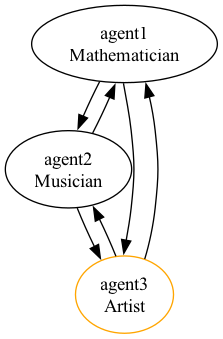

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN")),
        Member(name="agent3", role="Artist", description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")),
    ]
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with math? 2+2=?"))
g.update_group_messages(Message(sender="agent1", action="solve", result="2+2=4"))
g.update_group_messages(Message(sender="user", action="talk", result="Can anyone help me with music?"))

In [4]:
g.group_messages.context

[Message(sender='user', action='talk', result='Can anyone help me with math? 2+2=?'),
 Message(sender='agent1', action='solve', result='2+2=4'),
 Message(sender='user', action='talk', result='Can anyone help me with music?')]

In [5]:
# Do handoff
# After handoff the current agent will be updated to the one who will speak next
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

# Print the group message protocol instance
print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))
print('-'*50)
print("Below Message Send To `{}` who is {}".format(g.current_agent,g.members_map[g.current_agent].role))
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

 
[2024-12-09 16:12:36][INFO]: handoff from agent3 to agent2 by using auto2 mode
--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "8ba1160c-3cc4-4bc8-a522-4527bb7bbf4e",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math.",
                "access_token": null
            },
            {
                "name": "agent2",
                "role": "Musician",
                "description": "Transfer to me if you need help with music.",
                "access_token": null
            },
            {
                "name": "agent3",
                "role": "Artist",
                "description": "Transfer to me if you need help with art.",
                "access_token": null


In [6]:
g.update_group_messages(Message(sender="user", action="talk", result="How about music for reading?"))
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-09 16:12:44][INFO]: no handoff needed, stay with agent2 judge by auto2 mode


Message(sender='agent2', action='talk', result="If you're looking for music that pairs well with reading, I would recommend exploring instrumental genres or ambient music. These types of music typically have soothing melodies and minimal lyrics, which can help create a focused atmosphere without distracting you from the text. \n\nSome great options include:\n\n1. **Classical Music**: Composers like Johann Sebastian Bach, Claude Debussy, and Erik Satie offer beautiful piano pieces and orchestral works that can enhance concentration.\n\n2. **Lo-fi Hip-Hop**: This genre has gained popularity for its laid-back beats and gentle rhythms. It often features soft samples and can create a cozy background for reading.\n\n3. **Ambient Music**: Artists like Brian Eno and Max Richter produce soundscapes that are perfect for maintaining a calm and serene environment.\n\n4. **Film Scores**: Many film soundtracks, especially those by composers like Hans Zimmer or Thomas Newman, have sweeping melodies t

In [7]:
g.update_group_messages(Message(sender="user", action="talk", result="Let's discuss what is beauty."))
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 16:13:02][INFO]: handoff from agent2 to agent3 by using auto2 mode


Message(sender='agent3', action='talk', result='Beauty is a multifaceted concept that has intrigued philosophers, artists, and thinkers for centuries. At its core, beauty can be perceived as a quality that brings pleasure, harmony, and aesthetic satisfaction to the observer. It often transcends mere physical appearance to encompass deeper emotional and intellectual resonances.\n\nIn art, beauty can manifest in various forms, whether through vibrant colors, intricate designs, or evocative themes that provoke thought and stir emotions. Artists often strive to capture beauty in their work, aiming to evoke a sense of wonder, reflection, or connection with the audience. \n\nPhilosophically, beauty has been discussed in terms of its subjective and objective qualities. Some argue that beauty lies in the eye of the beholder, suggesting that personal experiences and cultural contexts shape our perceptions. Others assert that certain standards of beauty are universal, rooted in symmetry, balance

In [11]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 15:58:47][INFO]: handoff from agent3 to agent1 by using auto2 mode


Message(sender='agent1', action='talk', result='Beauty can also be examined through the lens of mathematics. In mathematics, beauty often refers to the elegance and simplicity of a solution, theorem, or equation. For instance, many mathematicians find beauty in the symmetry of geometric shapes, the harmony of mathematical relationships, or the power of a concise proof.\n\nThe Fibonacci sequence is a perfect example of this intersection. It appears frequently in nature, such as in the arrangement of leaves, the branching of trees, and the patterns of various fruits and flowers. The ratio derived from the Fibonacci sequence, known as the golden ratio, is often associated with aesthetically pleasing proportions in art and architecture.\n\nAdditionally, mathematical concepts like fractals exhibit beauty in their infinite complexity and self-similarity, captivating both mathematicians and artists alike. This suggests that beauty transcends discipline and can be found in various forms, wheth

In [12]:
g.call_agent(next_speaker_select_mode="auto2",include_current=False,model="gpt-4o-mini")

 
[2024-12-09 15:58:50][INFO]: handoff from agent1 to agent2 by using auto2 mode


Message(sender='agent2', action='talk', result="Beauty is indeed a multifaceted concept that resonates across various disciplines, inviting rich discussions and interpretations. As we've seen from our previous exchanges, both art and mathematics reveal distinct yet interconnected perspectives on beauty.\n\nFrom the artistic viewpoint, beauty is often seen as a subjective experience that evokes pleasure and emotional resonance. Artists strive to encapsulate beauty through their creations, whether it be through vivid landscapes, evocative portraits, or abstract forms. This pursuit is influenced by cultural backgrounds and personal experiences, making beauty a unique reflection of the artist's vision and the viewer's interpretation.\n\nOn the mathematical side, beauty emerges from the elegance and simplicity inherent in mathematical solutions and structures. The beauty found in mathematical concepts like the Fibonacci sequence or fractals exemplifies how patterns and relationships can evo

In [13]:
print('-'*50)
print(g.current_agent)
print('-'*50)
print(g._build_send_message(g.group_messages,cut_off=3,send_to=g.current_agent))

--------------------------------------------------
agent2
--------------------------------------------------
### Background Information

This is a test environment

### Members

- agent1 (Mathematician)
- agent2 (Musician)
- agent3 (Artist)

### Your Previous Message

```agent2:talk
Beauty is indeed a multifaceted concept that resonates across various disciplines, inviting rich discussions and interpretations. As we've seen from our previous exchanges, both art and mathematics reveal distinct yet interconnected perspectives on beauty.

From the artistic viewpoint, beauty is often seen as a subjective experience that evokes pleasure and emotional resonance. Artists strive to encapsulate beauty through their creations, whether it be through vivid landscapes, evocative portraits, or abstract forms. This pursuit is influenced by cultural backgrounds and personal experiences, making beauty a unique reflection of the artist's vision and the viewer's interpretation.

On the mathematical side,

In [14]:
g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-09 15:58:59][INFO]: manually set the current agent to agent1


Message(sender='agent1', action='talk', result='Beauty is indeed a captivating theme that resonates across various fields, including mathematics, art, and music. Each discipline offers a unique perspective on what beauty represents and how it can be experienced.\n\nIn mathematics, beauty often arises from the simplicity and elegance of solutions or theorems. Take, for example, the concept of symmetry, which not only appears in mathematical equations but also reflects harmony in nature and art. The Fibonacci sequence and its connection to the golden ratio illustrate how mathematical patterns manifest aesthetically in natural forms, such as flowers and shells.\n\nOn the other hand, art captures beauty through emotional expression and sensory experiences. Artists interpret beauty in myriad ways, whether through the vivid colors of a sunset or the intricate details of a portrait. This subjectivity is influenced by culture, personal experiences, and historical context, making each artistic 

## Add and Delete Member

 
[2024-12-09 15:59:04][INFO]: Self-defined relationships


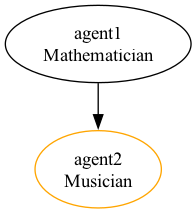

In [15]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Member(name="agent1", role="Mathematician", description="Transfer to me if you need help with math.", access_token=os.environ.get("AGENT1_ACCESS_TOKEN")),
        Member(name="agent2", role="Musician", description="Transfer to me if you need help with music.", access_token=os.environ.get("AGENT2_ACCESS_TOKEN"))
    ],
    relationships={"agent1": ["agent2"]}
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

 
[2024-12-09 15:59:05][INFO]: Self-defined relationships
 
[2024-12-09 15:59:05][INFO]: Succesfully add member agent3


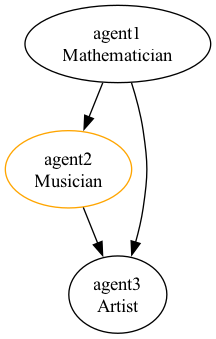

In [16]:
g.add_member(
        Member(
            name="agent3", role="Artist",
            description="Transfer to me if you need help with art.", access_token=os.environ.get("AGENT3_ACCESS_TOKEN")
            ),[("agent1","agent3"),("agent2","agent3")]
    )

Image(g.draw_relations())

 
[2024-12-09 15:59:05][INFO]: Self-defined relationships
 
[2024-12-09 15:59:05][INFO]: current agent agent2 is deleted, randomly select agent1 as the new current agent
 
[2024-12-09 15:59:05][INFO]: Successfully delete member agent2


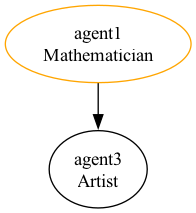

In [17]:
g.delete_member("agent2")
Image(g.draw_relations())

In [18]:

g.update_group_messages(Message(sender="user", action="talk", result="can you recommend me a art work?"))
next_agent = g.handoff(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini")

 
[2024-12-09 15:59:07][INFO]: handoff from agent1 to agent3 by using auto2 mode
